In [1]:
from cmath import nan
from math import isnan
import difflib
from tkinter.tix import COLUMN 
import pandas as pd
import numpy as np
import json
from pathlib import Path
import lib.pdfield as pdfield
from matplotlib import pyplot as plt


In [2]:
%reload_ext autoreload
%autoreload 2

### Setup connection to Field-database-server based on config.json file ###
config = pdfield.loadconfigs('config\config.json')
api = pdfield.couchDB_APIs(config)

In [3]:
### Import all documents from Target Field-database ###
targetDOCs= pdfield.getAllDocs(api)
targetDF, docfields  = pdfield.allDocsToDf(targetDOCs)




The database uruk contains 19904 docs.
This is round 1offset : 0
This is round 2offset : 10000
19904
['created', 'modified', '_id', '_rev', 'project', 'resource.identifier']


In [14]:
%reload_ext autoreload
%autoreload 2
pd.options.display.max_columns = None
configdict = targetDF[targetDF['id'] == 'configuration'].iloc[0]['forms']
results = pdfield.fuzzy_search_with_value(configdict, 'periods-Uruk')
if results:
    path, value = results[0]
    print("Path:", path)
    print("Value:", value)
else:
    print("No matching key found.")
core_valuelists = pd.read_json(config['centralconfigs_url'] + '/Library/Valuelists.json')
print(results[0][1])
print(core_valuelists[results[0][1]])

Path: ['Find:default', 'valuelists', 'period']
Value: periods-Uruk-1
periods-Uruk-1
createdBy                                    IT-Referat, DAI, 2019
creationDate                                                      
description                                                     {}
values           {'Ubaid 0': {'label': {'en': 'Ubaid 0'}}, 'Uba...
order            [Ubaid 0, Ubaid 1, Ubaid 2, Ubaid 3, Ubaid 4, ...
deprecated                                                     NaN
indeterminate                                                  NaN
Name: periods-Uruk-1, dtype: object


In [15]:
%reload_ext autoreload
%autoreload 2
print(core_valuelists[results[0][1]]['order'])
expdf= pdfield.expand_dict_column(targetDF, 'period')
expdf = expdf.apply(pdfield.fuzzyAdaptStringsByNormstrings, inputfield='period_value', normitems=core_valuelists[results[0][1]]['order'], fuzziness=0.35, keepunmatchedvalues = False, axis=1)

      


['Ubaid 0', 'Ubaid 1', 'Ubaid 2', 'Ubaid 3', 'Ubaid 4', 'Early Uruk', 'Middle Uruk', 'Late Uruk', 'Jemdet Nasr', 'Early Dynastic I', 'Early Dynastic II', 'Early Dynastic III', 'Akkadian', 'Ur III', 'Isin-Larsa', 'Old Babylonian', 'Middle Babylonian', 'Isin II', 'New Babylonian', 'Late Babylonian', 'Seleucid-Parthian', 'Sassanian', 'Islamic', 'Recent']
No norm found for:  sp�t
No norm found for:  E
No norm found for:  m
No norm found for:  3.Jt.
No norm found for:  EDI
No norm found for:  G
No norm found for:  EDI
No norm found for:  sp�t
No norm found for:  ?
No norm found for:  nBtospB?
No norm found for:  oB?mb?
No norm found for:  EDI
No norm found for:  EDI
No norm found for:  JN?ED1
No norm found for:  Gn
No norm found for:  EDI
No norm found for:  3.Jt.
No norm found for:  EDI
No norm found for:  m
No norm found for:  EDI
No norm found for:  E
No norm found for:  EDI
No norm found for:  EDoB
No norm found for:  EDI
No norm found for:  EDI
No norm found for:  3Jt.?
No norm found f

period_value
Akkadian               152
Early Dynastic I       968
Early Dynastic II       13
Early Dynastic III      17
Early Uruk               2
Isin-Larsa             189
Islamic                 54
Jemdet Nasr             56
Late Babylonian         77
Late Uruk              236
Middle Babylonian      768
Middle Uruk              4
New Babylonian          73
Old Babylonian         289
Sassanian               31
Seleucid-Parthian     1043
Ubaid 0                  1
Ubaid 4                 19
Ur III                 263
dtype: int64
['Ubaid 0', 'Ubaid 1', 'Ubaid 2', 'Ubaid 3', 'Ubaid 4', 'Early Uruk', 'Middle Uruk', 'Late Uruk', 'Jemdet Nasr', 'Early Dynastic I', 'Early Dynastic II', 'Early Dynastic III', 'Akkadian', 'Ur III', 'Isin-Larsa', 'Old Babylonian', 'Middle Babylonian', 'Isin II', 'New Babylonian', 'Late Babylonian', 'Seleucid-Parthian', 'Sassanian', 'Islamic', 'Recent']


<AxesSubplot:title={'center':'Warka Environs Survey'}, xlabel='period', ylabel='number of finds'>

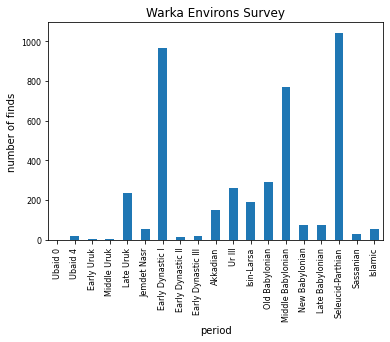

In [29]:

%reload_ext autoreload
%autoreload 2
#display(expdf.columns)
plotdf = expdf.groupby(['period_value']).size(),
print(plotdf[0])
print(core_valuelists[results[0][1]]['order'])
plotdf2 = pdfield.sort_series_by_list(plotdf[0], sort_list= core_valuelists[results[0][1]]['order'])
#print(plotdf2)
plotdf2.plot(kind= 'bar',title='Warka Environs Survey', xlabel="period", ylabel="number of finds", fontsize=8)

NameError: name 'sns' is not defined

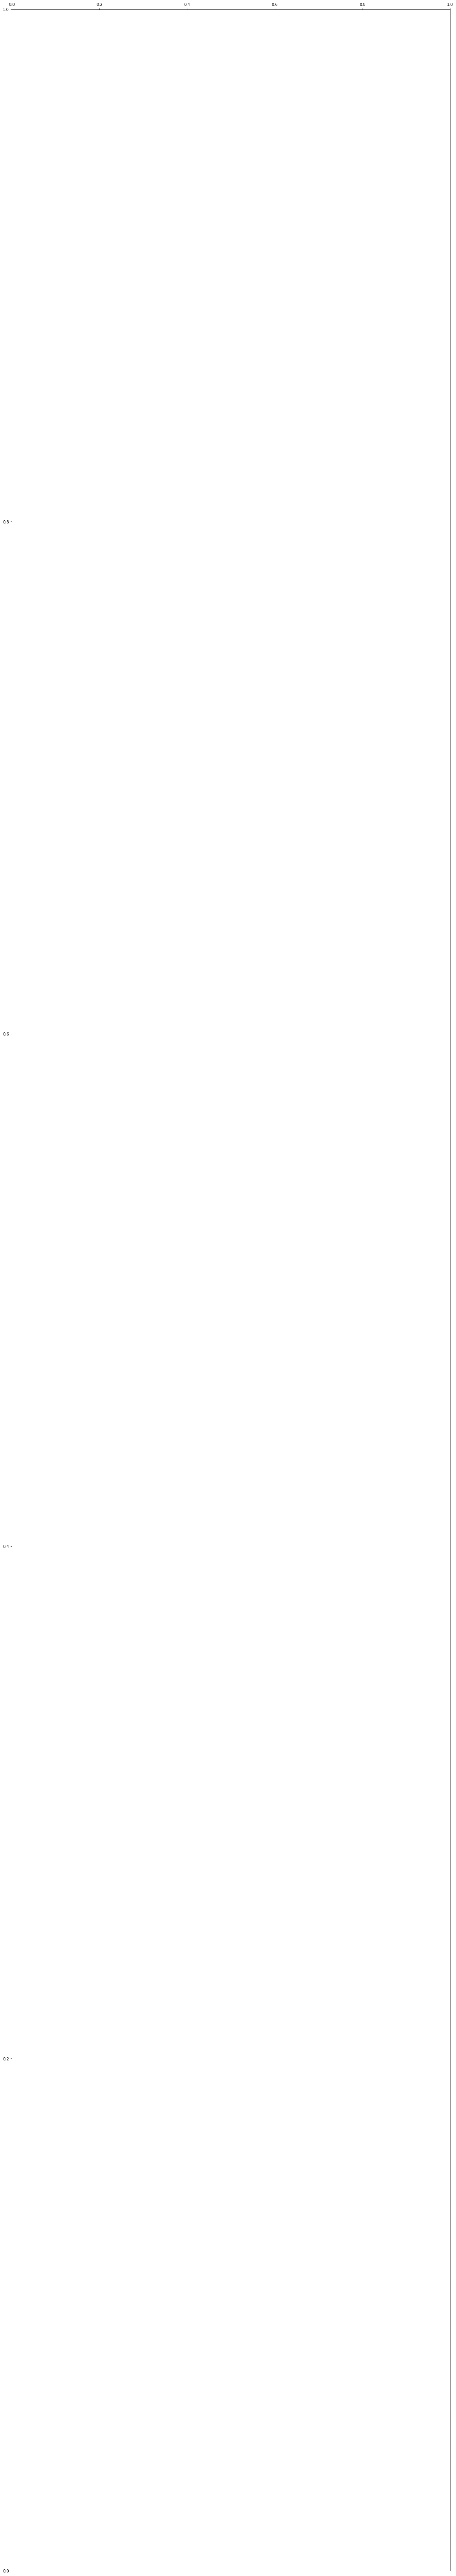

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 120)
ax.xaxis.tick_top()
sns.color_palette('pastel', len(testdbs))
#colors = {'milet':'red', 'heliopolis-project':'green', 'bogazkoy-hattusa':'blue', 'olympia_sht':'yellow', 'monte-turcisi-project':'orange', 'wuq18':'purple','pergamongrabung-1': 'grey', 'ayamonte':''}
mergeDfT.plot.barh(xlabel="new x", ylabel="new y",stacked=True, color=sns.color_palette(cc.glasbey, len(testdbs)), fontsize=8, ax=ax)
#sns.plotbarh(xlabel="new x", ylabel="new y", data = mergeDfT, stacked=True, fontsize=6, ax=ax)
fig.savefig('C:/Users/mhaibt/Documents/evalIdaiField/test2png.png', dpi=150)
#ax.set_xticklabels(fontsize = 10)
#plt.show()